# Content:
1. [Simple example](#1.-Simple-example)
2. [Parametric equations](#2.-Parametric-equations)
3. [Polishing the plot](#3.-Polishing-the-plot)
4. [Contour plot](#4.-C)

## 1. Simple example

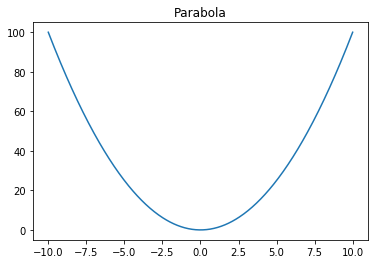

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#=== x-range
x_min=-10
x_max=10
x_grids=501
x=np.linspace(x_min, x_max, x_grids)

#=== variables to plot
y=x**2

#=== plot
plt.plot(x,y)
plt.title('Parabola')
plt.show()

You can change the default style such as line color, line width, etc. Bookmark [Matplotlib documentation](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html) and refer this page for more details.

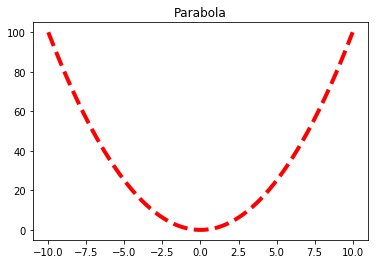

In [2]:
#=== plot
plt.plot(x,y,color='r',linestyle='dashed',linewidth=4)
plt.title('Parabola')
plt.show()

## 2. Parametric equations

[Lissajous curves](https://en.wikipedia.org/wiki/Lissajous_curve) are defined by the parametric equations 

$$
\begin{align}
x & = A\sin(at+\pi/2)\\ 
y & =  Bsin(bt)
\end{align}
$$

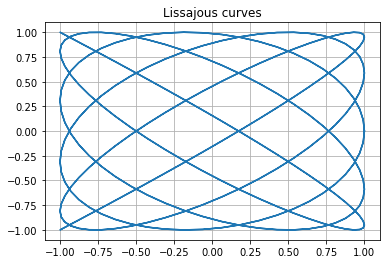

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#=== t-range
t_min=-np.pi
t_max=np.pi
t_grids=501
t=np.linspace(t_min, t_max, t_grids)

#=== Constants
A=1
B=1
a=10
b=9

#=== variables to plot
x=A*np.sin(a*t+np.pi/2)
y=B*np.sin(b*t)

#=== plot
plt.plot(x,y)
plt.title('Lissajous curves')
plt.grid()
plt.show()

#=== To see the current working directory, uncomment the following 2 lines
#import os
#os.getcwd() 

## 3. Polishing the plot

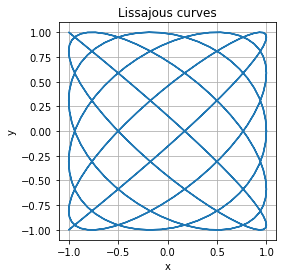

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#=== t-range
t_min=-np.pi
t_max=np.pi
t_grids=501
t=np.linspace(t_min, t_max, t_grids)

#=== Constants
A=1
B=1
a=10
b=9

#=== variables to plot
x=A*np.sin(a*t+np.pi/2)
y=B*np.sin(b*t)

#=== make it a square plot
fig = plt.figure()                        # comment if square plot is not needed
ax = fig.add_subplot(111)                 # comment if square plot is not needed
plt.plot(x,y)
ax.set_aspect('equal', adjustable='box')  # comment if square plot is not needed

#=== labels, titles, grids
plt.xlabel("x")
plt.ylabel("y")
plt.title('Lissajous curves')
plt.grid()

#=== save in file, you can also use .pdf or .svg
plt.savefig('Lissajous.png')  

#=== display
plt.show()

## 4. Contour plot 

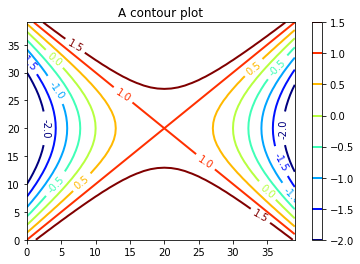

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#=== Define a 2D function
def f(x,y):
    #z=(x**2+y**2)
    z=(1-x**2+y**2)
    return z

x=np.arange(-2.0,2.0,0.1)
y=np.arange(-2.0,2.0,0.1)

X,Y=np.meshgrid(x,y)

Z=f(X,Y)

N_iso=np.arange(-2,2,0.5)

CS=plt.contour(Z,N_iso,linewidths=2,cmap=mpl.cm.jet)
plt.clabel(CS, inline=True, fmt='%1.1f', fontsize=10)
plt.colorbar(CS)
plt.title('A contour plot')
plt.show()

## 5. Beginner-level animation

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio

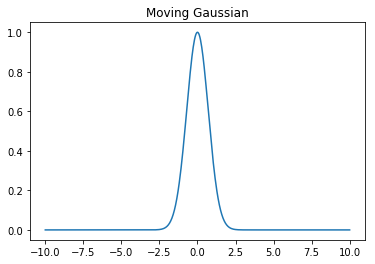

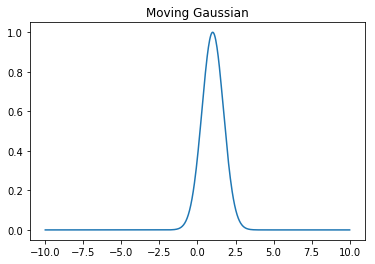

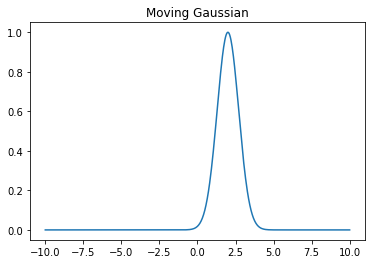

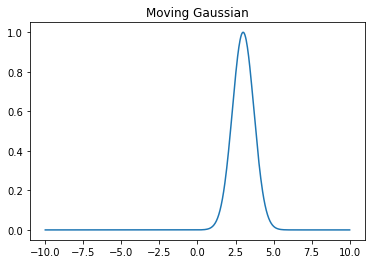

In [7]:
x_min=-10
x_max=10
x_grids=501
x=np.linspace(x_min, x_max, x_grids)## ONE ##

def gauss(x,x0):
    f=np.exp(-(x-x0)**2)
    return f

#=== plot-1
x0=0
y=gauss(x,x0)
plt.plot(x,y)
plt.title('Moving Gaussian')
plt.savefig('_tmp_1.png')
plt.show()
#=== plot-2
x0=1
y=gauss(x,x0)
plt.plot(x,y)
plt.title('Moving Gaussian')
plt.savefig('_tmp_2.png')
plt.show()
#=== plot-3
x0=2
y=gauss(x,x0)
plt.plot(x,y)
plt.title('Moving Gaussian')
plt.savefig('_tmp_3.png')
plt.show()
#=== plot-4
x0=3
y=gauss(x,x0)
plt.plot(x,y)
plt.title('Moving Gaussian')
plt.savefig('_tmp_4.png')
plt.show()

In [8]:
# Build GIF
with imageio.get_writer('mygif1.gif', mode='I') as writer:
    for filename in ['_tmp_1.png', '_tmp_2.png', '_tmp_3.png', '_tmp_4.png']:
        image = imageio.imread(filename)
        writer.append_data(image)

Double click the next image and then shift+enter

![SegmentLocal](mygif1.gif "segment")

## 6. Intermediate-level animation

In [40]:
import numpy as np
import matplotlib.pyplot as plt

#=== Particle-in-a-box solutions
hbar=1
mass=1
L = 1

#=== Eigenvalues
n=1
E1=n**2 * np.pi**2 * hbar**2 / (2.0 * mass * L**2)
n=2
E2=n**2 * np.pi**2 * hbar**2 / (2.0 * mass * L**2)

x=np.linspace(0,1,101)

def psi1(x):  # Ground state, n = 1
    n=1
    L=1
    val=np.sqrt(2.0/L)*np.sin(n*np.pi*x/L)
    return val
    
def psi2(x):  # First excited state, n = 2
    n=2
    L=1
    val=np.sqrt(2.0/L)*np.sin(n*np.pi*x/L)
    return val
    
c1=1.0/np.sqrt(2.0)
c2=1.0/np.sqrt(2.0)

filenames = []
t=0
it=0
dt=0.01
i=complex(0,1)

dx=0.1
#print(np.sqrt(np.dot(psi1(x)*dx,psi1(x)*dx))) # uncomment to check for Normalization

while it <= 100:
    psi=c1*psi1(x)*dx*np.exp(-i*E1*t/hbar) + c2*psi2(x)*dx*np.exp(-i*E2*t/hbar)
    
    plt.plot(x,np.real(psi)**2+np.imag(psi)**2)

    plt.xlim(0, 1)
    plt.ylim(0, 0.2)
    plt.xlabel("x")
    plt.ylabel("$|\psi|^2$(x)")   #NOTE: LaTex syntax for psi
    plt.title('Time evolution of $[\psi_1+\psi_2]/\sqrt{2}$')
    
    plt.text(0.2,0.15, r'$time=$ {0:10.3f} [au]'.format(t), fontsize=10)
    
    filename='_tmp_'+str(it).zfill(5)+'.png'
    filenames.append(filename)
    plt.savefig(filename)

    plt.close()
    t=t+dt
    it=it+1
    
# build gif
with imageio.get_writer('mygif2.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

Double click the next image and then shift+enter

![SegmentLocal](mygif2.gif "segment")